In [23]:
library(dplyr)
library(ggplot2)
library(cowplot)
library(qvalue)

In [24]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [25]:
crm_file = paste0(revision_folder, "Annas_results_all_common_eqtls.csv")
# crm_file = paste0(revision_folder,"Annas_results_all_common_eqtls_with_Bonferroni.csv")
crm = read.csv(crm_file, row.names=1)

In [28]:
crm_assoc = crm[crm$chrom %in% c(20,21,22),]

In [29]:
head(crm_assoc)

,gene,n_snps,chrom,pv_raw,snpID,pv,eqtl
7476,ENSG00000100206,639,22,0.4846768,22_38815543_G_T,1,ENSG00000100206-22_38815543_G_T
7477,ENSG00000100206,639,22,0.5735132,22_38815767_C_T,1,ENSG00000100206-22_38815767_C_T
7478,ENSG00000100206,639,22,0.8756466,22_38816059_T_C,1,ENSG00000100206-22_38816059_T_C
7479,ENSG00000100206,639,22,0.1460246,22_38816351_G_A,1,ENSG00000100206-22_38816351_G_A
7480,ENSG00000100206,639,22,0.2546127,22_38817047_A_G,1,ENSG00000100206-22_38817047_A_G
7481,ENSG00000100206,639,22,0.1834585,22_38817105_C_T,1,ENSG00000100206-22_38817105_C_T


In [7]:
# crm_assoc$fdr = p.adjust(crm_assoc$pv_raw, method = "BH")

In [7]:
res_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/CRM_interaction_chr22/results/"
all_files = list.files(res_dir)
length(all_files)

[1] 23213

In [8]:
correct_files = list.files(res_dir,"*0.tsv")
length(correct_files)

[1] 23212

In [9]:
all_files[!(all_files %in% correct_files)]

[1] "summary.csv"

In [44]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
nrow(crm_int)
head(crm_int,2)

[1] 245350

,gene,n_snps,chrom,pv_raw,snpID
0,ENSG00000250479,10,22,0.3439653,22_24071877_G_A
1,ENSG00000250479,10,22,0.4098352,22_24072256_G_C


In [45]:
crm_int_file

[1] "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/CRM_interaction_chr22/results/summary.csv"

In [46]:
unique(as.character(crm_int$chrom))

[1] "22" "20" "21"

In [48]:
# unique(as.character(crm_int[crm_int$chrom == 20, ]$gene))
length(unique(as.character(crm_int[crm_int$chrom == 20, ]$gene)))
length(unique(as.character(crm_int[crm_int$chrom == 21, ]$gene)))
length(unique(as.character(crm_int[crm_int$chrom == 22, ]$gene)))

[1] 81

[1] 93

[1] 271

In [49]:
length(unique(as.character(crm_int$gene)))

[1] 445

In [50]:
crm_int$fdr = p.adjust(crm_int$pv_raw, method = "BH")

In [51]:
df_join = inner_join(crm_assoc, crm_int, by=c("snpID","gene"), suffix=c(".assoc",".int"))
df_join$fdr_assoc = p.adjust(df_join$pv_raw.assoc, method = "BH")

In [52]:
nrow(df_join)

[1] 245350

In [53]:
thresholds = seq(0, 1, length.out = 100)

In [54]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)

In [55]:
# FDR < 20%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.2,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.2,"gene"]))
}

In [56]:
head(df_plot)

assoc_FDR,n_GxC,n_eGenes
0.00000000,0,0
0.01010101,1855,52
0.02020202,2080,61
0.03030303,2427,72
0.04040404,2669,78
0.05050505,2752,79


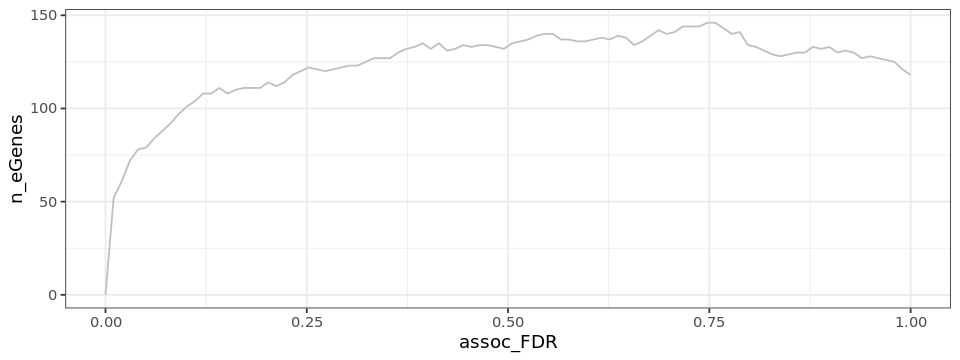

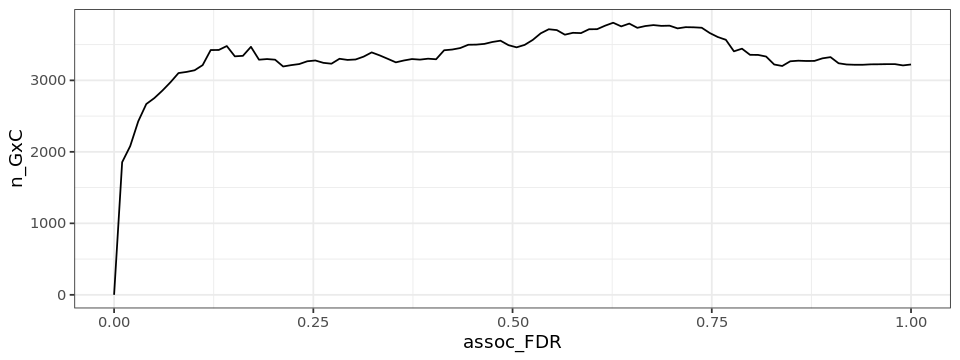

In [57]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [58]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
# FDR < 10%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.1,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.1,"gene"]))
}

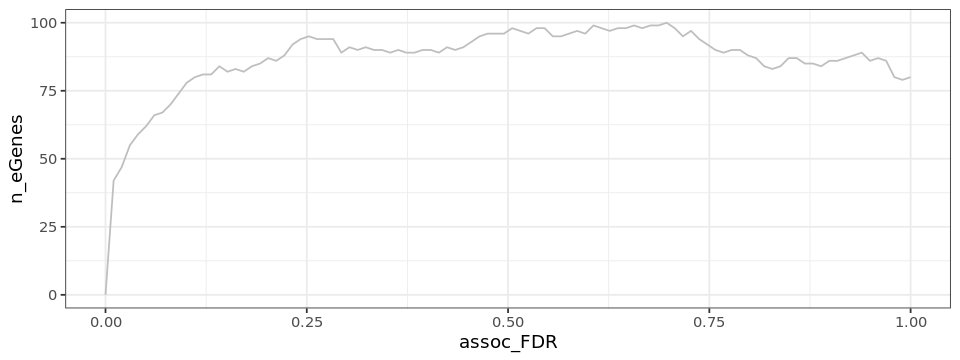

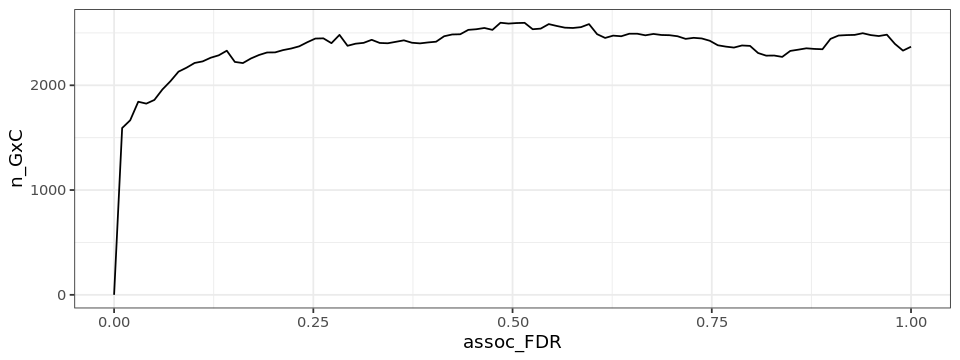

In [59]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [60]:
# FDR < 5%
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.05,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.05,"gene"]))
}

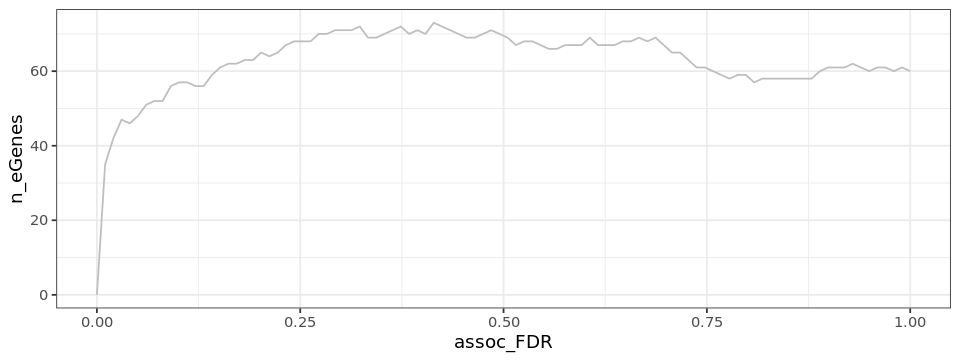

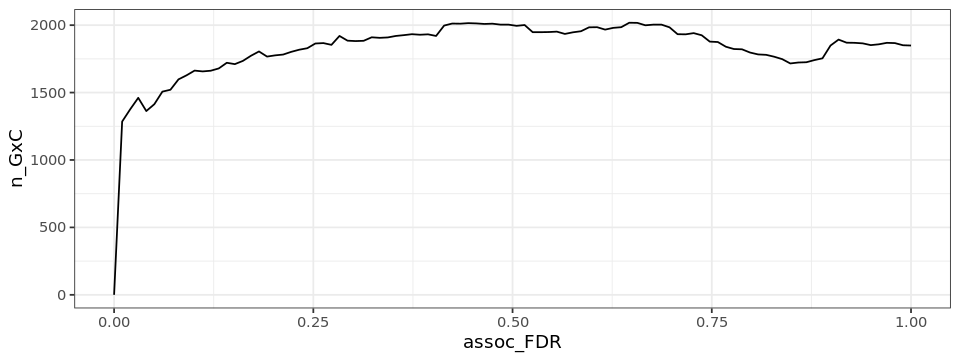

In [61]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [62]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
# FDR < 1%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.01,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.01,"gene"]))
}

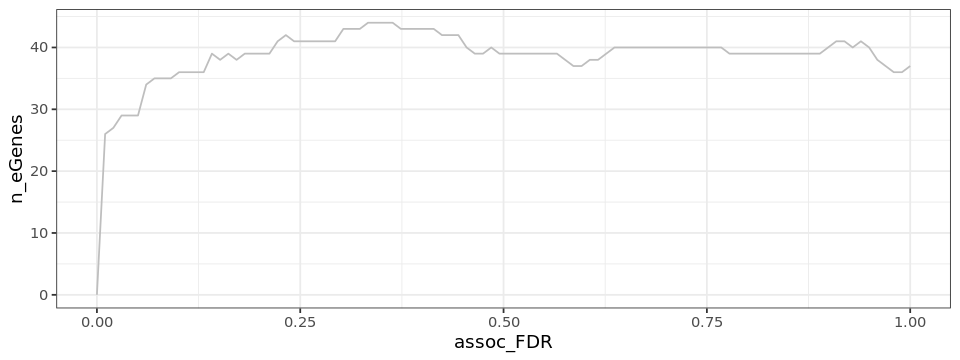

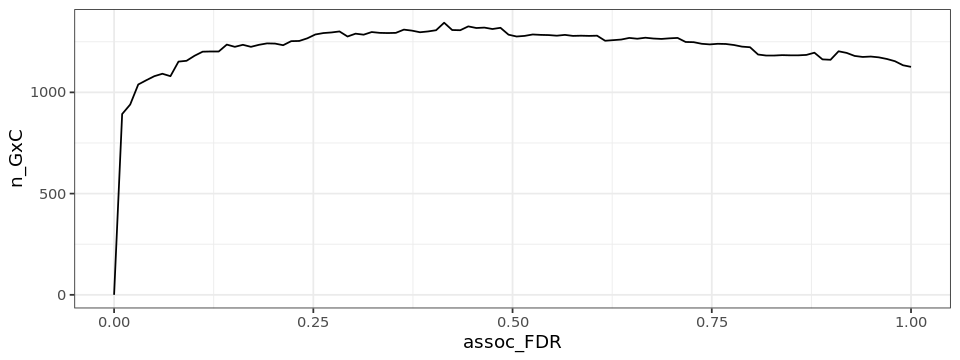

In [63]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()